## Will a Customer Accept the Coupon?
### <font color='blue'>Alessandro Morato</font>
#### <font color='blue'>BH-PCMLAI, January 2024</font>
###

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Searching for missing values
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
#Shape of the dataset (rows, columns)
print("NR rows of the dataset is:", data.shape[0])
print("NR columns of the dataset is:", data.shape[1])

NR rows of the dataset is: 12684
NR columns of the dataset is: 26


The dataset features 12684 rows and 26 columns.
The dataset has six columns with missing values (NaN):

- "car": 12576
- "Bar": 107
- "CoffeeHouse": 217
- "CarryAway": 151
- "RestaurantLessThan20": 130
- "Restaurant20To50: 189

"car" is the worst one, with 99% of values missing.

3. Decide what to do about your missing data -- drop, replace, other...

As reported in the previous point, cloumns containing NaN values can be divided into two main groups:

- "car" has 99% of values missing (12576 out of 12684). This column is basically empty therefore I do not think it contains useful information: I decide to delete this. All persons interviewed are "drivers".


- "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50" have around 1% of values missing. In this case the missing information is quite small and the vast majority of rows contain meaningful information: therefore I decide to keep these columns and to replace the missing values with the values mostly recurrent in the other rows.

In [6]:
#1- Dropping column "car"
data = data.drop(columns='car')

#2- Replacing NA values in remaining 5 columns:
data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

I verify all the columns don't report any NaN value left.

While verifying that there aren't undefined values left, I noticed that in the column "toCoupon_GEQ15min" all raws are '1': this means (I believe) that all the coupons are farther than 5min. Therefore I made a new column "ToCoupon_distance" with values: '5-15min', '15-25min', '>25min'. To to this, I designed a specific function, "howFarIs(more_15min, more_25min)".

In [7]:
def howFarIs (more_15min, more_25min):
    if more_15min and more_25min:
        return '>25min'
    elif more_15min and not(more_25min):
        return '15-25min'
    elif not(more_15min) and not(more_25min):
        return '5-15min'
    else:
        return np.nan

In [8]:
data['To_Coupon_Distance'] = data.apply(lambda x: howFarIs(x['toCoupon_GEQ15min'], x['toCoupon_GEQ25min']), axis=1)

In [9]:
#Random pick-up of a few samples to check the effectiveness of the function:
data[['toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'To_Coupon_Distance']].sample(10)

,toCoupon_GEQ15min,toCoupon_GEQ25min,To_Coupon_Distance
4095,0,0,5-15min
6669,0,0,5-15min
3219,0,0,5-15min
6634,1,0,15-25min
10060,1,0,15-25min
6801,0,0,5-15min
5278,1,1,>25min
12366,0,0,5-15min
5555,0,0,5-15min
4594,0,0,5-15min


In [10]:
#I can delete the three now-unnecessary columns:
data = data.drop(columns=['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min'])

In [11]:
#There is one minor mistake in the name of one of the columns: 'passAnger' instead of 'passEnger':
data = data.rename(columns={'passanger': 'passenger'})

In [12]:
#For a personal 'aesthetical' sense, I prefer the column names starting with upper case letter:

data.columns = data.columns.map(lambda x: x[:1].upper() + x[1:])

In [13]:
#Check of resulting columns:
data.isna().sum()

Destination             0
Passenger               0
Weather                 0
Temperature             0
Time                    0
Coupon                  0
Expiration              0
Gender                  0
Age                     0
MaritalStatus           0
Has_children            0
Education               0
Occupation              0
Income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
Direction_same          0
Direction_opp           0
Y                       0
To_Coupon_Distance      0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



The proportion of persons who accept the coupon is 56.84%

In [14]:
#Proportion of the total observations which chose to accept the coupon: (rows with Y=1) / (total number of rows) * 100

data.query("Y ==1").shape[0] / len(data) * 100

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

I here plot the "coupon" column, giving evidence to the total number or coupons provided per kind together with the number of accepted ones. In order to make the percentage of acceped coupons more evident, I also plotted this one.

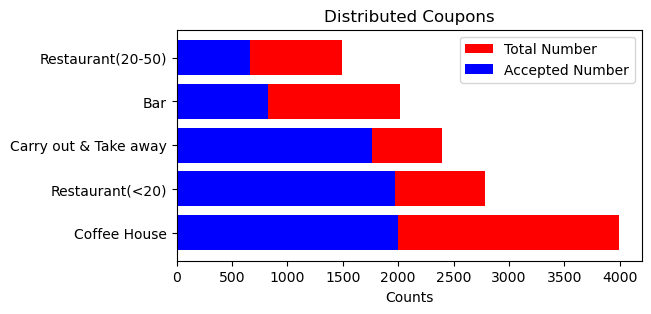

In [15]:
df_plt = pd.DataFrame(sorted(list(data['Coupon'].unique())),columns=['Coupon'])
df_plt['Total_Count'] = list(data.groupby('Coupon').Y.count())
df_plt['Accepted'] = list(data[data.Y==1].groupby('Coupon').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)


#Bar plot for "coupon" column
df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Coupon'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Coupon'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Distributed Coupons')
plt.show()

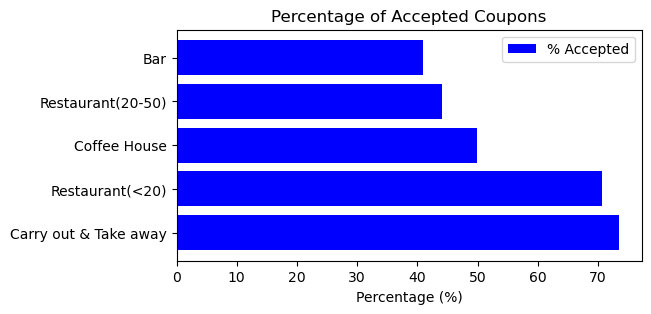

In [16]:
df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Coupon'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('Percentage of Accepted Coupons')
plt.show()

6. Use a histogram to visualize the temperature column.

I here plot the "temperature" column, giving evidence to the total number or counts with the number of accepted coupons per temperature. It seems at high temperatures (80F) are more favorable for accepted coupons.

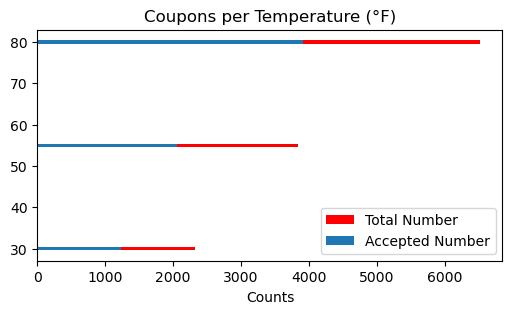

In [17]:
df_plt = pd.DataFrame(sorted(list(data['Temperature'].unique())),columns=['Temperature'])
df_plt['Total_Count'] = list(data.groupby('Temperature').Y.count())
df_plt['Accepted'] = list(data[data.Y==1].groupby('Temperature').Y.count())

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Temperature'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Temperature'],df_plt['Accepted'])
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coupons per Temperature (°F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
data_bar = data.query("Coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


The acceptance rate of Bar coupons is 41%

In [20]:
round(data_bar['Y'].value_counts()[1] / len(data_bar) * 100, 3)

41.001

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate of those who went to a bar 3 or fewer times a month: 37.1%

Acceptance rate of those who went to a bar >3 times a month: 76.9%

These percentages suggest that customers alredy used to come to a bar are more likely to accept a coupon. This is also well evident by the following plots, where lines "greater than 8" and "4-8" have higher accepted percentages than the others. It is also interesting to observe that said categories (gt8, 4-8) have a lower number of distributed coupons: this makes sense, since these persons are already good customers, so it is better to focus on persons who currently do not come often to bars (<= 3 times per month).

In [21]:
#Acceptance rate of those who went to a bar 3 or fewer times a month

subSet = data_bar.query('Bar == "never" or Bar == "less1" or Bar == "1~3"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

37.074

In [22]:
#Acceptance rate of those who went to a bar 1 or fewer times a month

subSet = data_bar.query('Bar == "never" or Bar == "less1"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

29.346

In [23]:
#Acceptance rate of those who went to a bar >3 times a month

subSet = data_bar.query('not(Bar == "never" or Bar == "less1" or Bar == "1~3")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

76.884

In [24]:
#Acceptance rate of those who went to a bar >1 times a month

subSet = data_bar.query('not(Bar == "never" or Bar == "less1")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

68.792

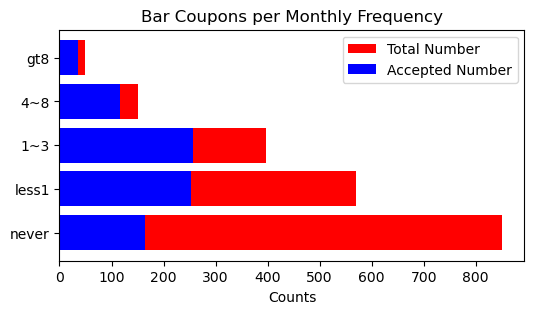

In [25]:
#Bar coupons per monthly frequency

df_plt = pd.DataFrame(sorted(list(data_bar['Bar'].unique())),columns=['Bar'])
df_plt['Total_Count'] = list(data_bar.groupby('Bar').Y.count())
df_plt['Accepted'] = list(data_bar[data_bar.Y==1].groupby('Bar').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Bar'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Bar'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Monthly Frequency')
plt.show()

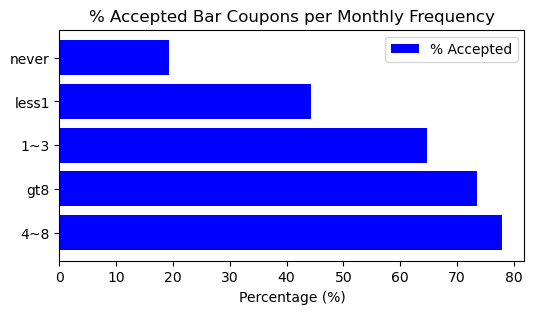

In [26]:
df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Bar'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Bar Coupons per Monthly Frequency')
plt.show()

I here plotted the "coupon" column, giving evidence to the total number or coupons provided per kind together with the number of accepted ones. In order to make the percentage of acceped coupons more evident, I also plotted this one.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 69.5%

Acceptance rate of others: 33.5%

The percentages suggest the first group is more likely to accept a coupon. This is resonable: the previous point showed how drivers already familiar with bars are more likely to accept coupons. Regarding the age, the following plots show how there is a difference between under and over 25y (48% vs 38%). The population older than 25y has a lower acceptance rate and this could explain the lower percentage compared to point #3.

In [27]:
#Acceptance rate: >1 per month AND >25y
ages_over25 = ['26', '31', '36', '41', '46', '50plus']
subSet = data_bar.query('Bar != "never" and Bar != "less1" and Age in @ages_over25')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

69.524

In [28]:
#Acceptance rate: >3 per month AND >25y
ages_over25 = ['26', '31', '36', '41', '46', '50plus']
subSet = data_bar.query('Bar != "never" and Bar != "less1" and Bar != "1~3" and Age in @ages_over25')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

77.206

In [29]:
#Acceptance rate: NOT(>1 per month AND >25y)
subSet = data_bar.query('not(Bar != "never" and Bar != "less1" and Age in @ages_over25)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

33.5

In [30]:
#Acceptance rate: NOT(>3 per month AND >25y)
subSet = data_bar.query('not(Bar != "never" and Bar != "less1" and Bar != "1~3" and Age in @ages_over25)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

38.384

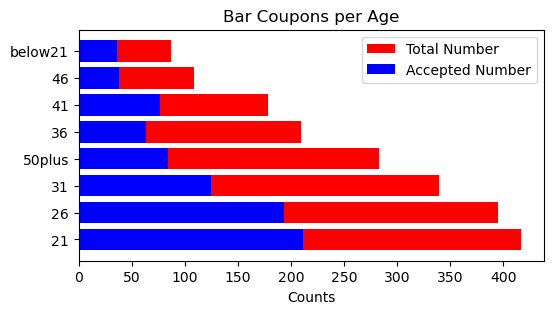

In [31]:
#Plot of Coupons per Age

df_plt = pd.DataFrame(sorted(list(data_bar['Age'].unique())),columns=['Age'])
df_plt['Total_Count'] = list(data_bar.groupby('Age').Y.count())
df_plt['Accepted'] = list(data_bar[data_bar.Y==1].groupby('Age').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Age'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Age'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Age')
plt.show()

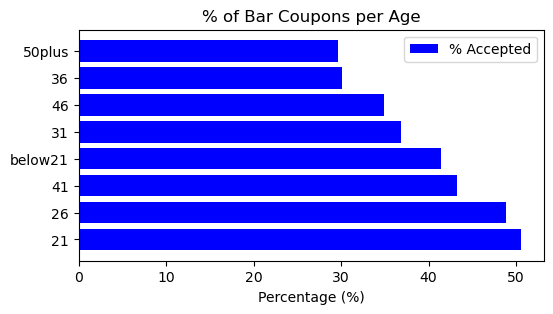

In [32]:
#Plot of Coupons per Age (%)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Age'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% of Bar Coupons per Age')
plt.show()

C:\Users\amorato\AppData\Local\Temp\ipykernel_10976\2152812998.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bar['Over/Under25y'] = data_bar.apply(lambda x: ageDivider(x['Age'], ages_over25), axis=1)


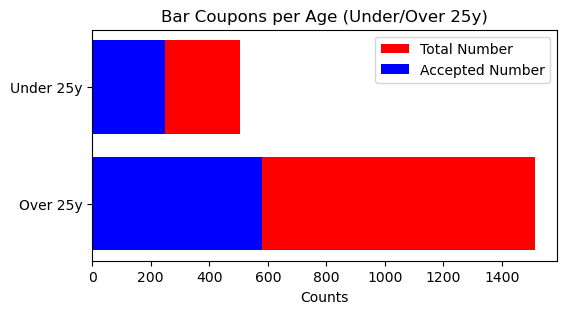

In [43]:
#Plot of Coupons per Age Group

def ageDivider(x, over25y_list):
    if x in over25y_list:
        return "Over 25y"
    else:
        return "Under 25y"

data_bar['Over/Under25y'] = data_bar.apply(lambda x: ageDivider(x['Age'], ages_over25), axis=1)

df_plt = pd.DataFrame(sorted(list(data_bar['Over/Under25y'].unique())),columns=['Over/Under25y'])
df_plt['Total_Count'] = list(data_bar.groupby('Over/Under25y').Y.count())
df_plt['Accepted'] = list(data_bar[data_bar.Y==1].groupby('Over/Under25y').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Over/Under25y'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Over/Under25y'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Age (Under/Over 25y)')
plt.show()

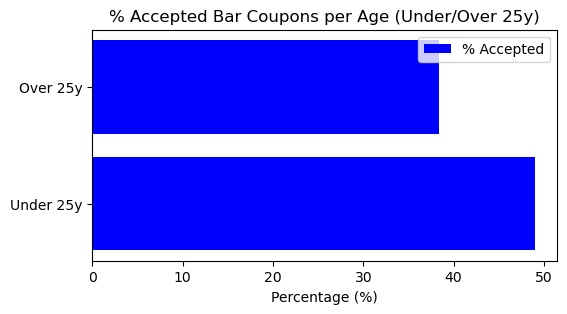

In [44]:
df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Over/Under25y'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Bar Coupons per Age (Under/Over 25y)')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.3%

Acceptance rate of others: 29.6%

In [45]:
freq_less1pm = ['never', 'less1']
freq_more1pm = ['1~3', '4~8', 'gt8']

subSet = data_bar.query('Bar in @freq_more1pm and Passenger != "Kid(s)" and Occupation != "Farming Fishing & Forestry"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

71.325

In [46]:
subSet = data_bar.query('not(Bar in @freq_more1pm and Passenger != "Kid(s)" and Occupation != "Farming Fishing & Forestry")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

29.604

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



6.1

Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.3%

Acceptance rate of others: 29.6%

6.2:

Acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 72.2%

Acceptance rate of others: 34.6%

6.3:

Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.3%

Acceptance rate of others: 40.1%

In [47]:
#6.1
subSet = data_bar.query('Bar in @freq_more1pm and Passenger != "Kid(s)" and MaritalStatus != "Widowed"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

71.325

In [48]:
subSet = data_bar.query('not(Bar in @freq_more1pm and Passenger != "Kid(s)" and MaritalStatus != "Widowed")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

29.604

In [49]:
#6.2
under30 = ['21', '26', 'below21']
subSet = data_bar.query('Bar in @freq_more1pm and Age in @under30')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

72.174

In [50]:
subSet = data_bar.query('not(Bar in @freq_more1pm and Age in @under30)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

34.569

In [51]:
#6.3
#data['income'].value_counts()
freq_more4pm = ['4~8', 'gt8']
income_less50k = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
subSet = data_bar.query('RestaurantLessThan20 in @freq_more4pm and Income in @income_less50k')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

45.349

In [52]:
subSet = data_bar.query('not(RestaurantLessThan20 in @freq_more4pm and Income in @income_less50k)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

40.108

Plots to get more insight:

In [53]:
data2 = data_bar

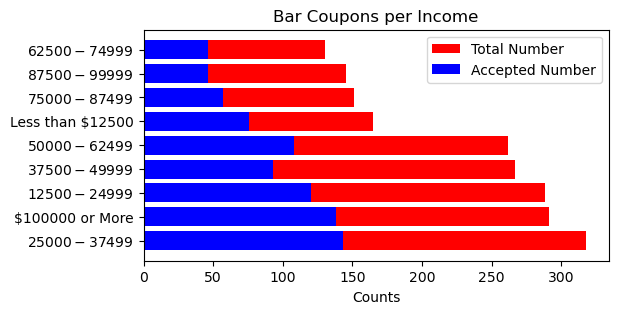

In [54]:
#Coupons per income

df_plt = pd.DataFrame(sorted(list(data2['Income'].unique())),columns=['Income'])
df_plt['Total_Count'] = list(data2.groupby('Income').Y.count())
df_plt['Accepted'] = list(data2[data2.Y==1].groupby('Income').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Income'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Income'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number', 'Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Income')
plt.show()

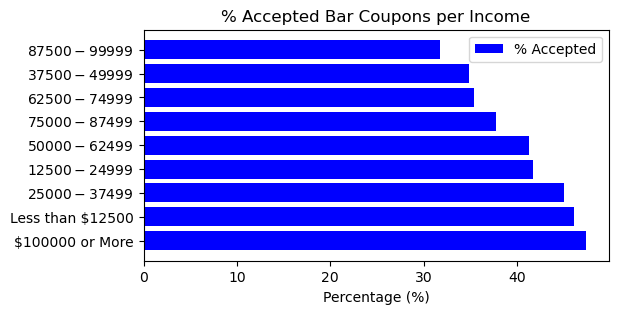

In [55]:
#Acceptance % Coupons per income

df_plt = pd.DataFrame(sorted(list(data2['Income'].unique())),columns=['Income'])
df_plt['Total_Count'] = list(data2.groupby('Income').Y.count())
df_plt['Accepted'] = list(data2[data2.Y==1].groupby('Income').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
#plt.barh(df_plt['income'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Income'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Bar Coupons per Income')
plt.show()

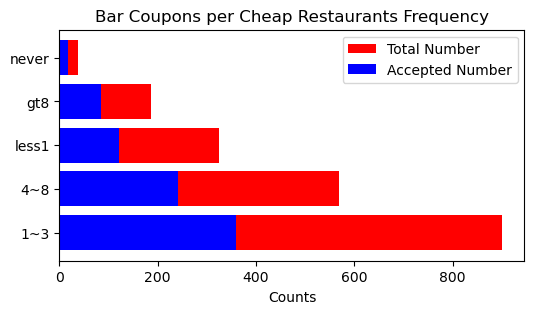

In [56]:
#Restaurants Frequency

df_plt = pd.DataFrame(sorted(list(data2['RestaurantLessThan20'].unique())),columns=['RestaurantLessThan20'])
df_plt['Total_Count'] = list(data2.groupby('RestaurantLessThan20').Y.count())
df_plt['Accepted'] = list(data2[data2.Y==1].groupby('RestaurantLessThan20').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['RestaurantLessThan20'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['RestaurantLessThan20'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Cheap Restaurants Frequency')
plt.show()

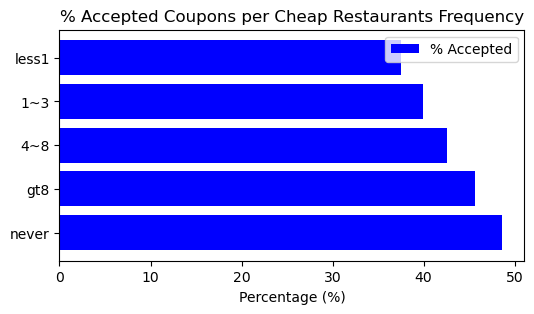

In [57]:
#Acceptance Percentage Restaurants Frequency

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['RestaurantLessThan20'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Coupons per Cheap Restaurants Frequency')
plt.show()

Text(0.5, 1.0, 'Cheap Restaurants Frequency vs Income - Accepted')

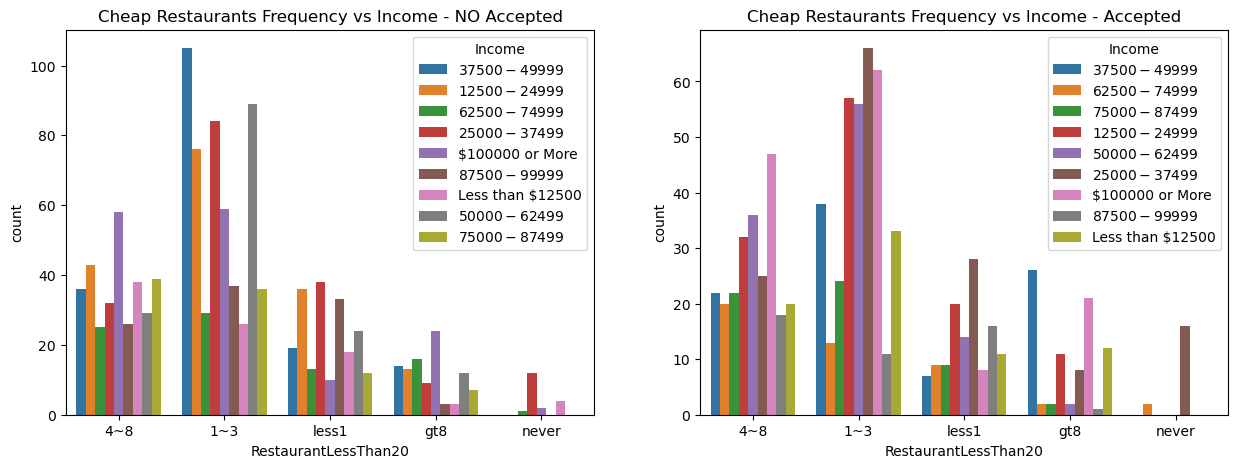

In [58]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=data_bar[data_bar.Y==0]['RestaurantLessThan20'],hue=data_bar[data_bar.Y==0]['Income'],ax=axes[0])
sns.countplot(x=data_bar[data_bar.Y==1]['RestaurantLessThan20'],hue=data_bar[data_bar.Y==1]['Income'],ax=axes[1])
axes[0].set_title('Cheap Restaurants Frequency vs Income - NO Accepted'); axes[1].set_title('Cheap Restaurants Frequency vs Income - Accepted')

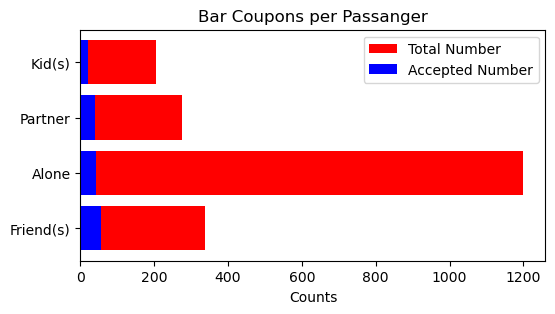

In [59]:
#Coupons with passengers

df_plt = pd.DataFrame(sorted(list(data2['Passenger'].unique())),columns=['Passenger'])
df_plt['Total_Count'] = list(data2.groupby('Passenger').Y.count())
df_plt['Accepted'] = list(data2[data2.Y==1].groupby('Passenger').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Passenger'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Passenger'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Bar Coupons per Passenger')
plt.show()

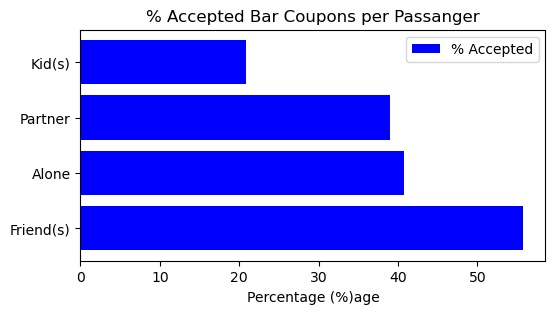

In [60]:
#Percentage accepted coupons with passengers

fig = plt.subplots(figsize =(6, 3))

plt.barh(df_plt['Passenger'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)age')
plt.title('% Accepted Bar Coupons per Passenger')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Regarding the drivers' habits, a series of observations can be done:

Drivers often visiting bars are more likely to accept coupons. This trend is very clear with different thresholds: e.g. more/less 3 times per month, or more/less 1 time per month. Comparing the acceptance rate of drivers used to bars (e.g. at least 1 per month) with the general acceptance rate of the bar dataset (69% vs 41%), we observe a huge improvement. The frequency seems a key feature.

Age itself doesn't have a crear trend regarding the acceptance rate. Ages 21 and 26 have the highest accepance rate: in general younger drivers seem more open to accept coupons. In fact by dividing the driver population into two groups, over 25y and under 25y, the latter group exhibits a slighly higher acceptance rate. Age however doesn't affect much the acceptance rate when combined with frequency per month. Indeed if we consider frequency (e.g. >1 or >3) combined with age (>25y), the acceptance rate is almost the same (around 69% and 77%).

Regarding the combinations "frequency >1 AND passenger NO Kids AND job in farming" vs "frequency >1 AND passenger NO Kids AND marital status Widow" they have the same acceptance rate because the population with "frequency >1" hasn't anyone in farming or widow: this means we are considering the same group twice. Therefore, drivers often at bars are unlikely in farming and widows. Another insight is related to the kids onboard: if drivers with a frequency >1 have an acceptance rate of 69%, the ones without kids onboard have an acceptance rate of 71.3%. This means that no-kids onboard could slighly increase the acceptance rate: this makes sense, since a bar isn't a place for kids... In general drivers alone are ones receiving more coupons for bars, and the ones more responsive are the ones driving with friends.

Regarding the group of drivers going to cheap restaurants AND with an income <50k, the acceptance rate is 45%. Looking at the distribution of coupons in function of income, the most covered classes are the low incomes (<62.5k) and the high incomes(>100k): therefore the population here observed is a good insight into a wide portion of drivers. Regarding the frequency at cheap restaurants, this actually affects the number of distributed bar coupons: the biggest targets are drivers going to cheap restaurants 1-8 times per month (1-3 highest group). The population here investigated (>4 per month) is not the biggest one, but it isn't negligible though. Regarding both income and frequency at cheap restaurants, both covered categories (income <50k, frequency >4 per month) show an average acceptance percentage of 40-45% each: the combined one is very close.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Before deciding which type of coupon I will investigate, I recover the initial plot of coupons distributed to the drivers: this allows me to see how they are distributed.

The most common coupon is the one for a "Coffe House" (nearly 4k coupons): I will investigate this category. The plot is very clear in reporting an acceptance rate of 50% (to double check, mathematical calculation is below).

In [100]:
data_coffee = data.query('Coupon == "Coffee House"')
#data_coffee = data[data['coupon'] == 'Coffee House']

In [62]:
round(data_coffee['Y'].value_counts()[1] / len(data_coffee) * 100, 3)

49.925

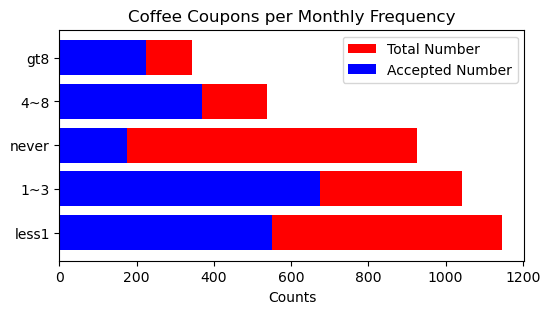

In [63]:
#Plot of Coffee Coupons per Frequency

df_plt = pd.DataFrame(sorted(list(data_coffee['CoffeeHouse'].unique())),columns=['CoffeeHouse'])
df_plt['Total_Count'] = list(data_coffee.groupby('CoffeeHouse').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('CoffeeHouse').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['CoffeeHouse'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['CoffeeHouse'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Monthly Frequency')
plt.show()

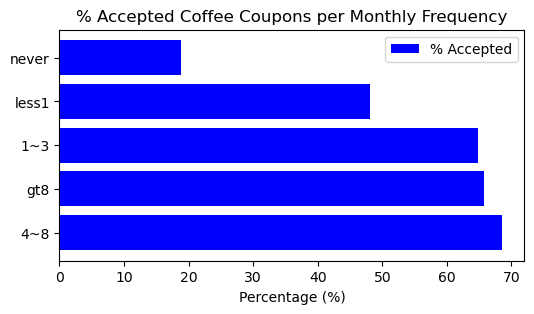

In [64]:
#Percentage of Accepted Coffee Coupons per Frequency
df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['CoffeeHouse'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Coffee Coupons per Monthly Frequency')
plt.show()

In [65]:
#Acceptance rate of those who went to a bar <1 times a month (35%)

subSet = data_coffee.query('CoffeeHouse == "never" or CoffeeHouse == "less1"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

35.005

In [66]:
#Acceptance rate of those who went to a bar <3 times a month (45%)

subSet = data_coffee.query('CoffeeHouse == "never" or CoffeeHouse == "less1" or CoffeeHouse == "1~3"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

44.961

In [67]:
#Acceptance rate of those who went to a bar >1 times a month (66%)

subSet = data_coffee.query('not(CoffeeHouse == "never" or CoffeeHouse == "less1")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

66.025

In [68]:
#Acceptance rate of those who went to a bar >3 times a month (67%)

subSet = data_coffee.query('not(CoffeeHouse == "never" or CoffeeHouse == "less1" or CoffeeHouse == "1~3")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

67.5

In [69]:
data_coffee_usual = data_coffee.query('CoffeeHouse in @freq_more1pm')

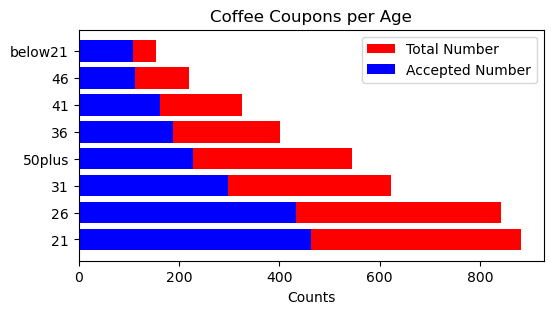

In [71]:
#Plot of Coffee Coupons per Age

df_plt = pd.DataFrame(sorted(list(data_coffee['Age'].unique())),columns=['Age'])
df_plt['Total_Count'] = list(data_coffee.groupby('Age').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Age').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Age'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Age'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Age')
plt.show()

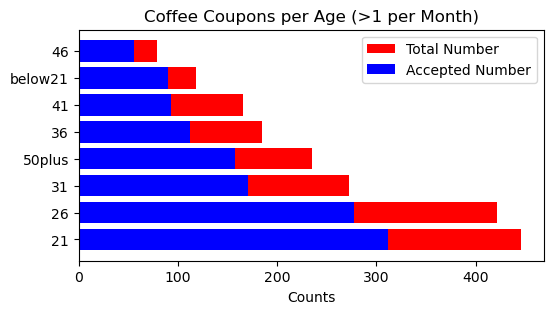

In [72]:
#Plot of Coffee Coupons per Age (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['Age'].unique())),columns=['Age'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('Age').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('Age').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Age'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Age'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Age (>1 per Month)')
plt.show()

As per "Bars", the most numerous groups are ages between 20-30y. Therefore I group the acceptance rates in "under 30" and "over 30"

In [73]:
#Acceptance rate: >30y
ages_over30 = ['31', '36', '41', '46', '50plus']
subSet = data_coffee.query('Age in @ages_over30')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

46.809

In [74]:
#Acceptance rate: >30y (with CoffeeHouses frequency >1 per month)
ages_over30 = ['31', '36', '41', '46', '50plus']
subSet = data_coffee_usual.query('Age in @ages_over30')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

62.967

In [75]:
#Acceptance rate: <30y
subSet = data_coffee.query('not(Age in @ages_over30)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

53.429

In [76]:
#Acceptance rate: <30y (with CoffeeHouses frequency >1 per month)
subSet = data_coffee_usual.query('not(Age in @ages_over30)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

68.934

As observed in the "Bar" analysis, age doesn't have a huge impact on the analysis: there is a slightly higher acceptance ratio for drivers <30y over older driver. By looking at the younger group there is an improvement of 3% (from 50% to 53%) and the same improvement can be observed limiting the analysis to the group more used to Coffee Houses, >1 per month (from 66% to 69%).

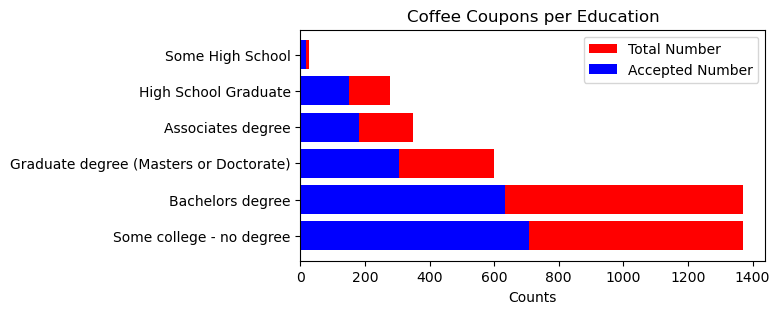

In [77]:
#Plot of Coffee Coupons per Education

df_plt = pd.DataFrame(sorted(list(data_coffee['Education'].unique())),columns=['Education'])
df_plt['Total_Count'] = list(data_coffee.groupby('Education').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Education').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Education'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Education'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Education')
plt.show()

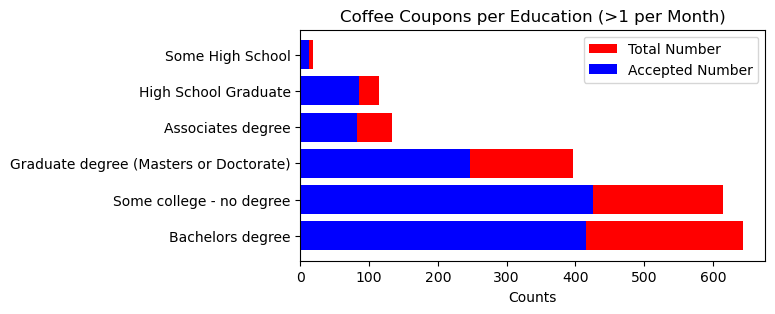

In [78]:
#Plot of Coffee Coupons per Education (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['Education'].unique())),columns=['Education'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('Education').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('Education').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Education'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Education'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Education (>1 per Month)')
plt.show()

"Education" looks related to this analysis. The more targeted drivers are the ones with advanced instruction diplomas: this makes sense to me, since Coffe Houses seem a nice place to study or to meet cohorts. Restricting the analysis to drivers already used to Coffee Houses further highlights the tendency and also increases the accepted ratios (all well above 50%).

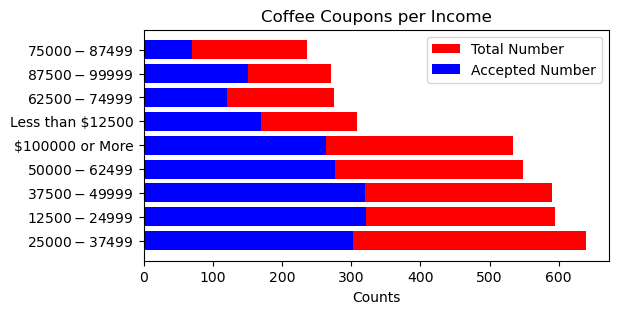

In [80]:
#Plot of Coffee Coupons per Income

df_plt = pd.DataFrame(sorted(list(data_coffee['Income'].unique())),columns=['Income'])
df_plt['Total_Count'] = list(data_coffee.groupby('Income').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Income').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Income'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Income'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Income')
plt.show()

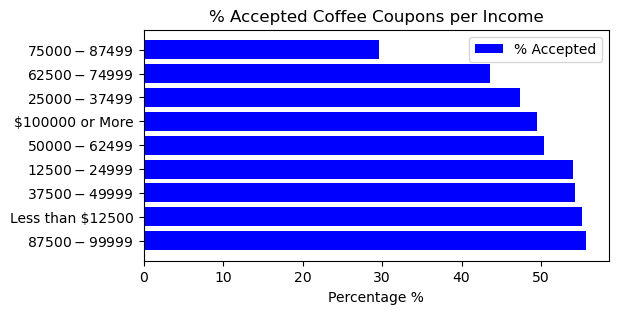

In [81]:
#Plot of Accepted Coffee Coupons per Income

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Income'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage %')
plt.title('% Accepted Coffee Coupons per Income')
plt.show()

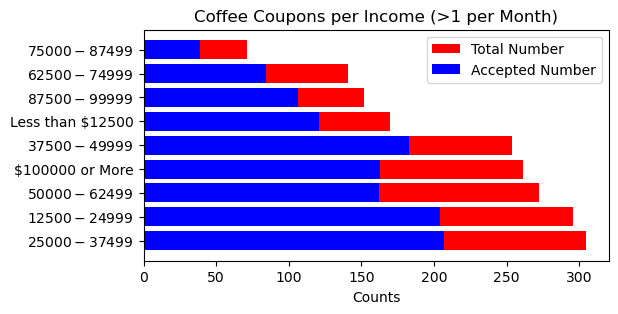

In [82]:
#Plot of Coffee Coupons per Income (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['Income'].unique())),columns=['Income'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('Income').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('Income').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Income'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Income'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Income (>1 per Month)')
plt.show()

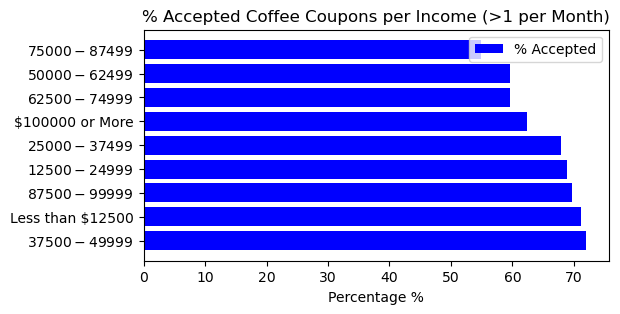

In [83]:
#Plot of Accepted Coffee Coupons per Income (with CoffeeHouses frequency >1 per month)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Income'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage %')
plt.title('% Accepted Coffee Coupons per Income (>1 per Month)')
plt.show()

In [84]:
#Acceptance rate: low income (<62.5k)
income_range = ['Less than $12500', '37500-49999', '50000-62499', '12500-24999', '25000-37499']

subSet = data_coffee.query('Income in @income_range')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

55.195

In [85]:
#Acceptance rate: high income

subSet = data_coffee.query('not(Income in @income_range)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

49.485

In [87]:
#Acceptance rate: low income (with CoffeeHouses frequency >1 per month)

subSet = data_coffee_usual.query('Income in @income_range')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

71.176

In [88]:
#Acceptance rate: high income (with CoffeeHouses frequency >1 per month)

subSet = data_coffee_usual.query('not(Income in @income_range)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

65.525

"Income" provides an insight similar to the one observed for Bars: low incomes and very high incomes (>100k) are the most targeted by coupon distribution. Regarding the acceptance rate, it looks like that low incomes (<62.5k) are more likely to accept coffee coupons: said low incomes indeed have an acceptance rate of 55% vs 49% of higher incomes. Frequency affects the percentages as a bias, drifting the values to 71% vs 65%.

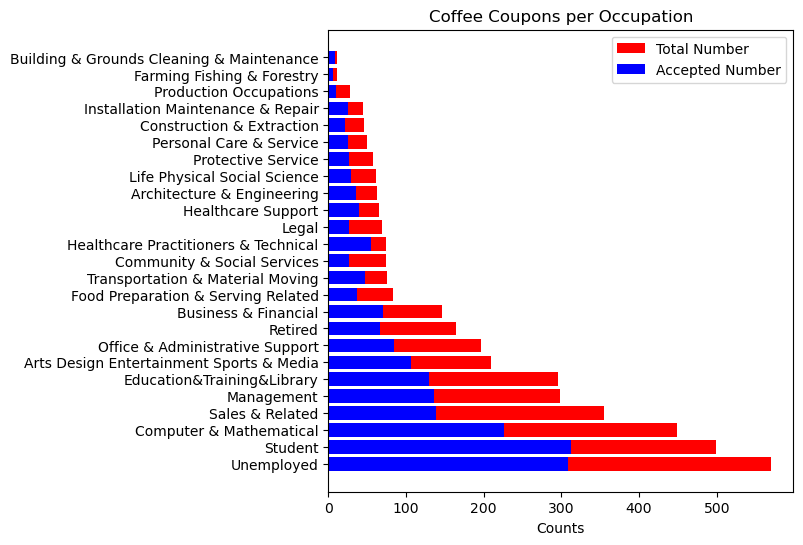

In [89]:
#Plot of Coffee Coupons per Occupation

df_plt = pd.DataFrame(sorted(list(data_coffee['Occupation'].unique())),columns=['Occupation'])
df_plt['Total_Count'] = list(data_coffee.groupby('Occupation').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Occupation').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 6))
plt.barh(df_plt['Occupation'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Occupation'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Occupation')
plt.show()

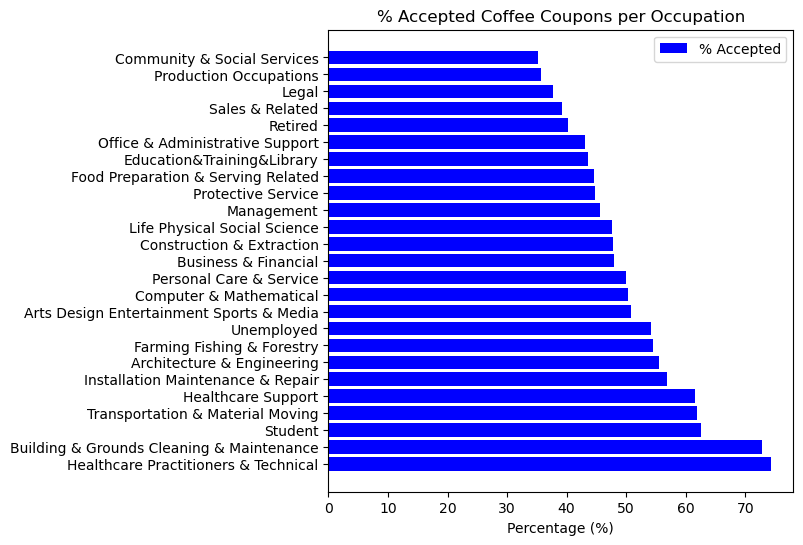

In [90]:
#Plot of Accepted Coffee Coupons per Occupation

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 6))
plt.barh(df_plt['Occupation'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Coffee Coupons per Occupation')
plt.show()

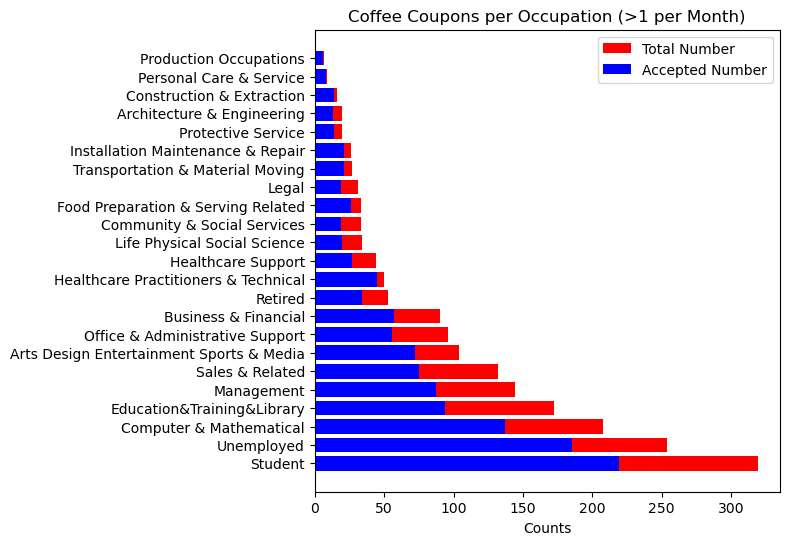

In [91]:
#Plot of Coffee Coupons per Occupation (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['Occupation'].unique())),columns=['Occupation'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('Occupation').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('Occupation').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 6))
plt.barh(df_plt['Occupation'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Occupation'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Occupation (>1 per Month)')
plt.show()

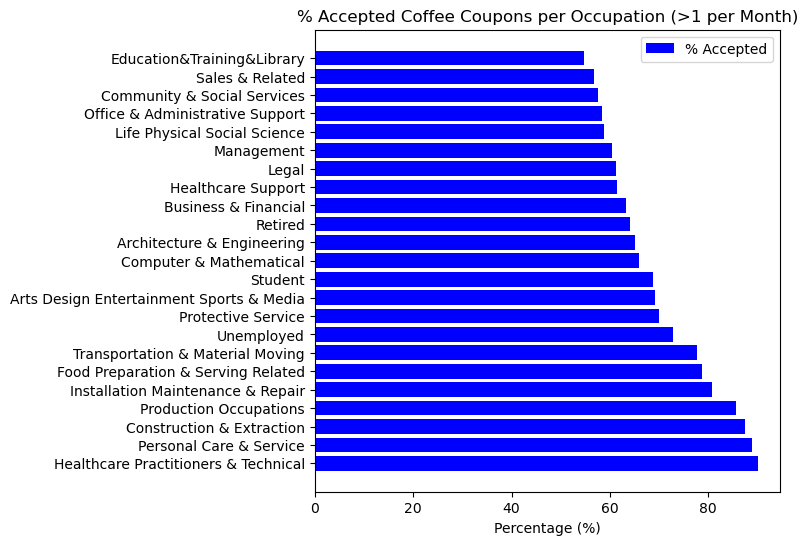

In [92]:
#Plot of Accepted Coffee Coupons per Occupation (with CoffeeHouses frequency >1 per month)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 6))
plt.barh(df_plt['Occupation'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage (%)')
plt.title('% Accepted Coffee Coupons per Occupation (>1 per Month)')
plt.show()

"Occupation" covers a wide range of jobs. It is interesting to see which ones are very unlikely to either receive a coupon or accept it. There is a general tendency to increase the acceptance ratio by restricting the analysis to the habitual customers (minimum acceptance rate from 40% to 60%). One consideration: one of the most targeted groups is "Students" and this agrees with the considerations done regarding "Education".

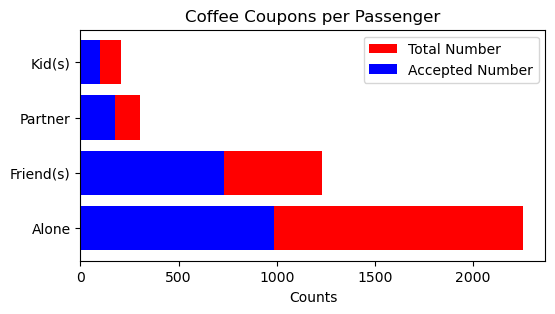

In [94]:
#Plot of Coffee Coupons per Passenger Onboard

df_plt = pd.DataFrame(sorted(list(data_coffee['Passenger'].unique())),columns=['Passenger'])
df_plt['Total_Count'] = list(data_coffee.groupby('Passenger').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Passenger').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Passenger'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Passenger'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Passenger')
plt.show()

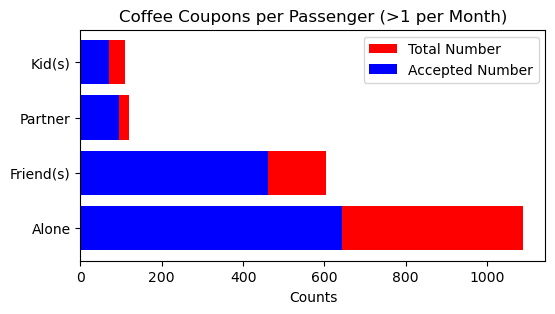

In [95]:
#Plot of Coffee Coupons per Passenger Onboard (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['Passenger'].unique())),columns=['Passenger'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('Passenger').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('Passenger').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Passenger'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Passenger'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Passenger (>1 per Month)')
plt.show()

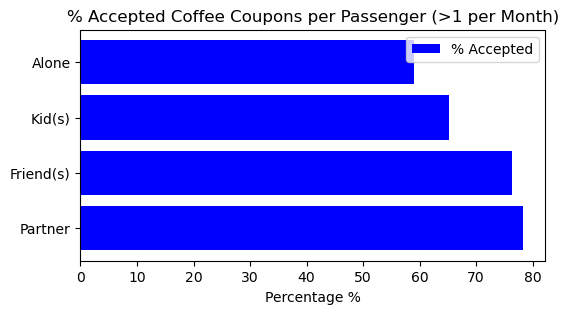

In [96]:
#Plot of Coffee Coupons per Passenger Onboard (with CoffeeHouses frequency >1 per month)

df_plt = df_plt.sort_values(by='%Accepted', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Passenger'],df_plt['%Accepted'], color='blue')
plt.legend(labels=['% Accepted'])
plt.xlabel('Percentage %')
plt.title('% Accepted Coffee Coupons per Passenger (>1 per Month)')
plt.show()

There is a clear tendency in distributing coupons to alone drivers: this makes sense to me, because everyone is more willing to stop for a coffee when with others. Involving only habitual customers, the trend of distributed numbers doesn't change much but the acceptance ratios are very pushed: drivers with a frequency of >1 per month with Friend(s) or Partner have an acceptance rate close to 80%. This seems like a very interesting parameter.

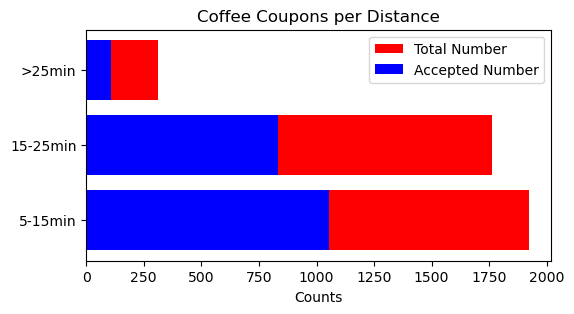

In [102]:
#Plot of Coffee Coupons per Distance

df_plt = pd.DataFrame(sorted(list(data_coffee['To_Coupon_Distance'].unique())),columns=['To_Coupon_Distance'])
df_plt['Total_Count'] = list(data_coffee.groupby('To_Coupon_Distance').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('To_Coupon_Distance').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['To_Coupon_Distance'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['To_Coupon_Distance'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Distance')
plt.show()

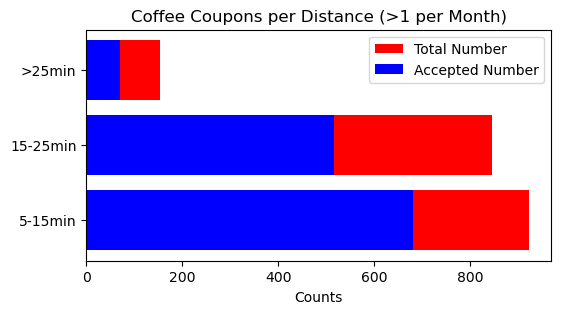

In [103]:
#Plot of Coffee Coupons per Distance (with CoffeeHouses frequency >1 per month)

df_plt = pd.DataFrame(sorted(list(data_coffee_usual['To_Coupon_Distance'].unique())),columns=['To_Coupon_Distance'])
df_plt['Total_Count'] = list(data_coffee_usual.groupby('To_Coupon_Distance').Y.count())
df_plt['Accepted'] = list(data_coffee_usual[data_coffee_usual.Y==1].groupby('To_Coupon_Distance').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['To_Coupon_Distance'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['To_Coupon_Distance'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Distance (>1 per Month)')
plt.show()

Very few coffee coupons are distributed for places further than 25 minutes.

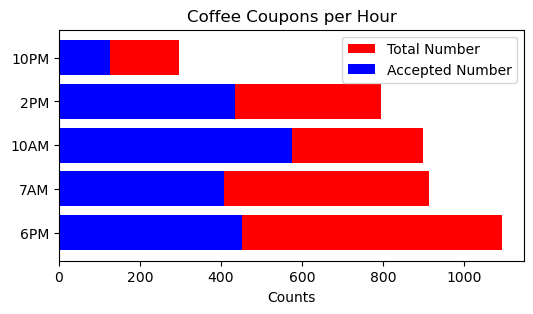

In [105]:
#Plot of Coffee Coupons per Hour

df_plt = pd.DataFrame(sorted(list(data_coffee['Time'].unique())),columns=['Time'])
df_plt['Total_Count'] = list(data_coffee.groupby('Time').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Time').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Time'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Time'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Hour')
plt.show()

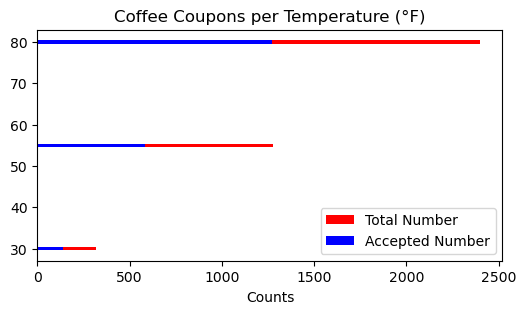

In [107]:
#Plot of Coffee Coupons per Temperature

df_plt = pd.DataFrame(sorted(list(data_coffee['Temperature'].unique())),columns=['Temperature'])
df_plt['Total_Count'] = list(data_coffee.groupby('Temperature').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Temperature').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Temperature'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Temperature'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Temperature (°F)')
plt.show()

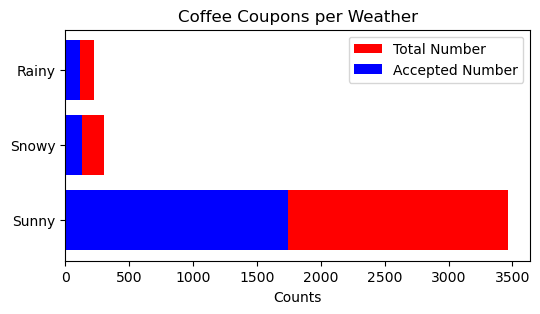

In [109]:
#Plot of Coffee Coupons per Weather

df_plt = pd.DataFrame(sorted(list(data_coffee['Weather'].unique())),columns=['Weather'])
df_plt['Total_Count'] = list(data_coffee.groupby('Weather').Y.count())
df_plt['Accepted'] = list(data_coffee[data_coffee.Y==1].groupby('Weather').Y.count())
df_plt['%Accepted'] = round(df_plt['Accepted']/df_plt['Total_Count']*100,3)

df_plt = df_plt.sort_values(by='Total_Count', ascending=False)

fig = plt.subplots(figsize =(6, 3))
plt.barh(df_plt['Weather'],df_plt['Total_Count'], color='red')
plt.barh(df_plt['Weather'],df_plt['Accepted'], color='blue')
plt.legend(labels=['Total Number','Accepted Number'])
plt.xlabel('Counts')
plt.title('Coffee Coupons per Weather')
plt.show()

Coffee coupons are distributed throughout the whole day, with much less frequency at 10PM: this is not a very appealing time for a coffee. Regarding whether and temperature, there is a clear peak in distributed coupons during sunny and warm days.

Text(0.5, 1.0, 'Destination vs Time (NO Accepted)')

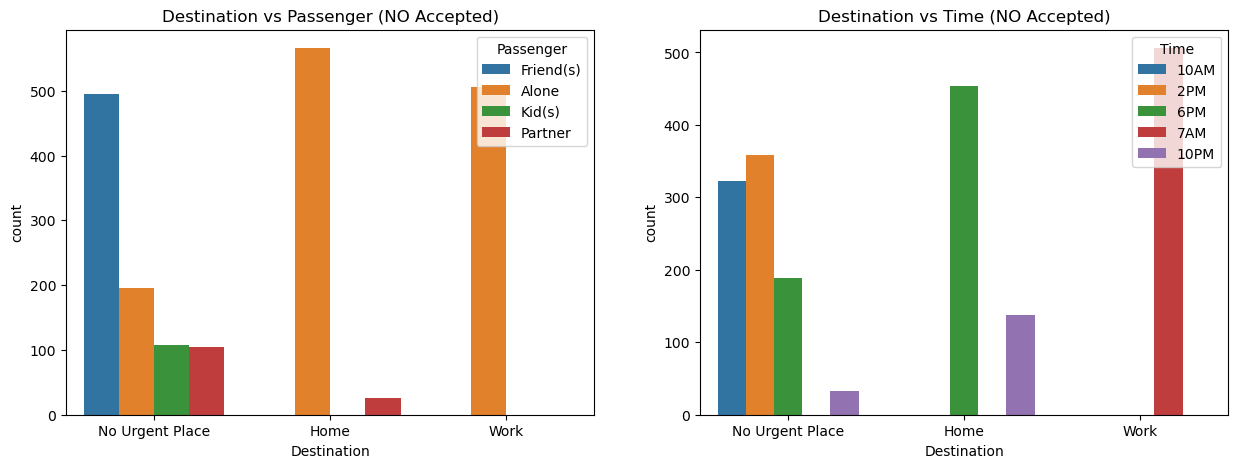

In [110]:
#Coffee Coupons: Destination vs Passenger / Time (NO Accepted)
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=data_coffee[data_coffee.Y==0]['Destination'],hue=data_coffee[data_coffee.Y==0]['Passenger'],ax=axes[0])
sns.countplot(x=data_coffee[data_coffee.Y==0]['Destination'],hue=data_coffee[data_coffee.Y==0]['Time'],ax=axes[1])
axes[0].set_title('Destination vs Passenger (NO Accepted)'); axes[1].set_title('Destination vs Time (NO Accepted)')

Text(0.5, 1.0, 'Destination vs Time (Accepted)')

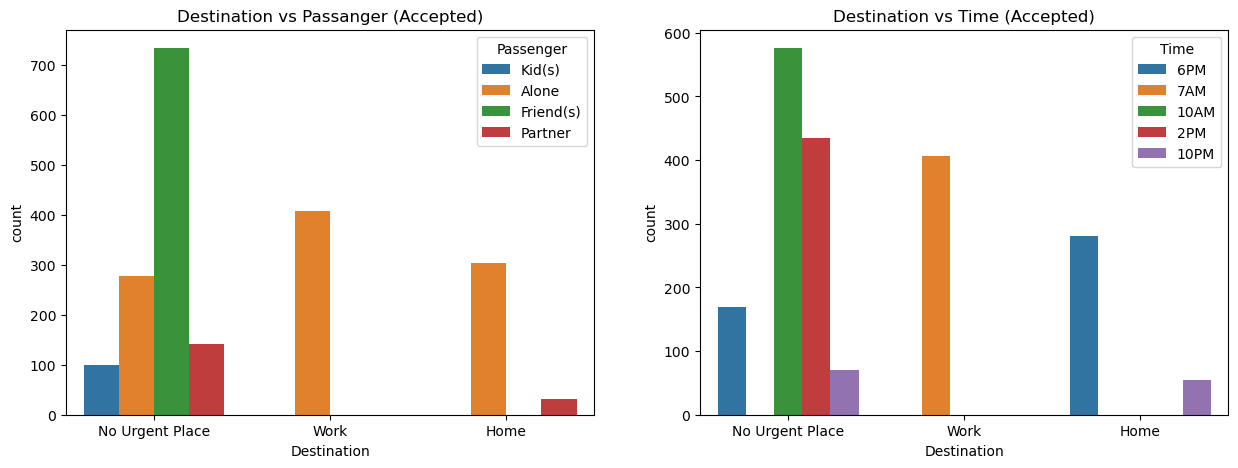

In [112]:
#Coffee Coupons: Destination vs Passenger / Time (ACCEPTED)
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=data_coffee[data_coffee.Y==1]['Destination'],hue=data_coffee[data_coffee.Y==1]['Passenger'],ax=axes[0])
sns.countplot(x=data_coffee[data_coffee.Y==1]['Destination'],hue=data_coffee[data_coffee.Y==1]['Time'],ax=axes[1])
axes[0].set_title('Destination vs Passenger (Accepted)'); axes[1].set_title('Destination vs Time (Accepted)')

In [114]:
#Acceptance rate: destination=Work, passenger=Alone

subSet = data_coffee.query('Destination == "Work" and Passenger == "Alone"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

44.578

In [115]:
#Acceptance rate: destination=Home, passenger=Alone

subSet = data_coffee.query('Destination == "Home" and Passenger == "Alone"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

34.943

In [116]:
#Acceptance rate: destination=Home, passenger=Partner

subSet = data_coffee.query('Destination == "Home" and Passenger == "Partner"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

55.172

In [117]:
#Acceptance rate: destination=No Urgent Place, time=10AM

subSet = data_coffee.query('Destination == "No Urgent Place" and Time == "10AM"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

64.071

In [118]:
#Acceptance rate: destination=Work, time=10AM

subSet = data_coffee.query('Destination == "Work" and Time == "7AM"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

44.578

I tried to relate the destination of the trip to the "passenger(s)" and the "time" of the trip.

1 - Destination vs Passenger(s):

- There is a clear tendency to accept the coupons with any passenger, if the trip is to a no-urgent place. As already observed "Friends" and "Partner" in particular increase the acceptance rate.

- "Work" as destination is for solo drivers only (44% acceptance)

- "Home" as destination is for drivers alone (35% accepted) or with the partner (55% accepted)

2 - Destination vs Time:

- When traveling to no-urgent place, I wasn't surpised to see that no coupons are distributed early in the morning (7AM). The most popular accepted time is 10AM (64% accepted)

- When traveling to work the only time covered is of course early morning (7AM), 45% accepted.

- When traveling to Home, the only times are late afternoon or evening (6PM, 10PM), they do not look very appealing.

Text(0.5, 1.0, 'Gender vs Marital Status (Accepted)')

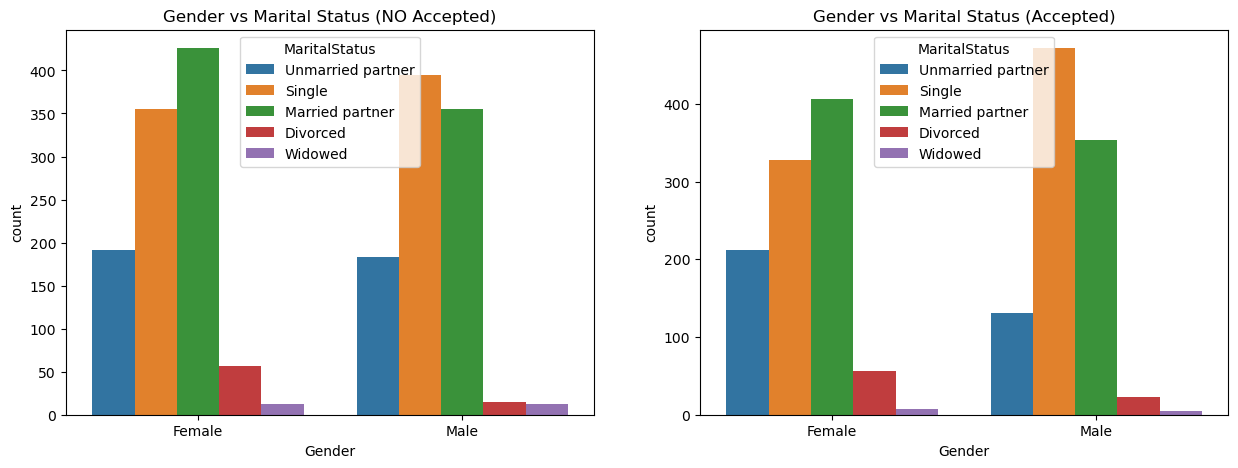

In [119]:
#Coffee Coupons: Gender vs Marital Status (NO Accepted and Accepted)
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=data_coffee[data_coffee.Y==0]['Gender'],hue=data_coffee[data_coffee.Y==0]['MaritalStatus'],ax=axes[0])
sns.countplot(x=data_coffee[data_coffee.Y==1]['Gender'],hue=data_coffee[data_coffee.Y==1]['MaritalStatus'],ax=axes[1])
axes[0].set_title('Gender vs Marital Status (NO Accepted)'); axes[1].set_title('Gender vs Marital Status (Accepted)')

In [121]:
#Acceptance rate: gender=Female, maritalStatus=Divorced

subSet = data_coffee.query('Gender == "Female" and MaritalStatus == "Divorced"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

49.558

In [122]:
#Acceptance rate: gender=Male, maritalStatus=Divorced

subSet = data_coffee.query('Gender == "Male" and MaritalStatus == "Divorced"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

60.526

In [123]:
#Acceptance rate: gender=Male, maritalStatus=Single

subSet = data_coffee.query('Gender == "Male" and MaritalStatus == "Single"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

54.441

Relating gender and marital status, it is evident that males are more ope to accept coupons, in particular Single and Divorced ones.

Text(0.5, 1.0, 'Carry Away vs Income (Accepted)')

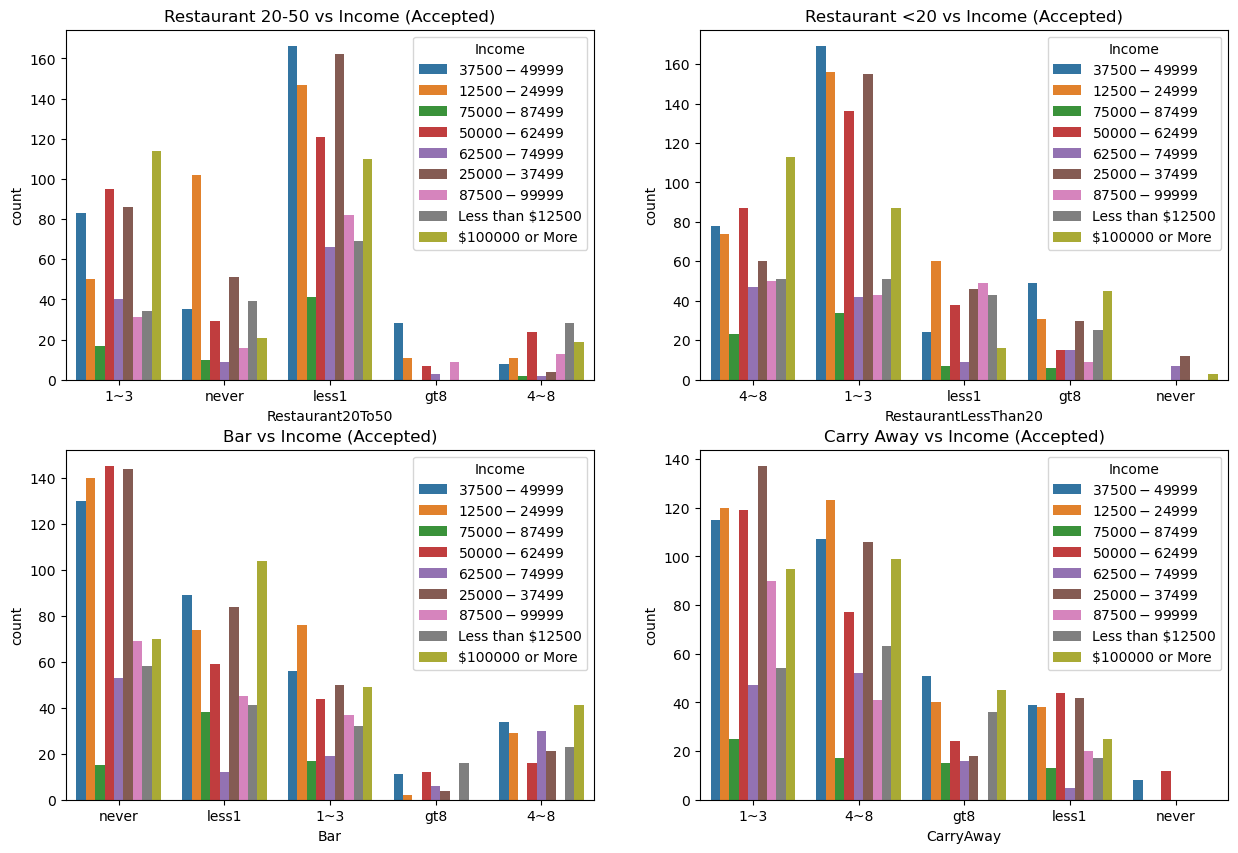

In [125]:
#Accepted Coffe Coupons: Other Venues vs Income
fig,axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(x=data_coffee[data_coffee.Y==1]['Restaurant20To50'],hue=data_coffee[data_coffee.Y==1]['Income'],ax=axes[0,0])
sns.countplot(x=data_coffee[data_coffee.Y==1]['RestaurantLessThan20'],hue=data_coffee[data_coffee.Y==1]['Income'],ax=axes[0,1])
sns.countplot(x=data_coffee[data_coffee.Y==1]['Bar'],hue=data_coffee[data_coffee.Y==1]['Income'],ax=axes[1,0])
sns.countplot(x=data_coffee[data_coffee.Y==1]['CarryAway'],hue=data_coffee[data_coffee.Y==1]['Income'],ax=axes[1,1])


axes[0,0].set_title('Restaurant 20-50 vs Income (Accepted)')
axes[0,1].set_title('Restaurant <20 vs Income (Accepted)')
axes[1,0].set_title('Bar vs Income (Accepted)')
axes[1,1].set_title('Carry Away vs Income (Accepted)')

Looking at the habits with other shops, i see that there are many accepted coffee coupons among drivers going:
- less 1 per month at good restaurants
- going 1-3 times per month to cheap restaurants
- less 3 times per month to bars
- 1-8 times per month to Carry Aways

(This is a very qualitative analysis)

To conclude, I try to identify some potential "TOP" groups very likely to accept a coffee coupon:

In [126]:
#1.1 - Acceptance rate: frequency more than 1 per month

freq_less1pm = ['never', 'less1']
freq_more1pm = ['1~3', '4~8', 'gt8']

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

66.025

In [127]:
#1.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

35.005

In [129]:
#2.1 - Acceptance rate: frequency more than 1 per month AND top education

top_education = ['Graduate degree (Masters or Doctorate)', 'Some college - no degree', 'Bachelors degree']

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Education in @top_education')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

65.801

In [130]:
#2.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Education in @top_education)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

38.701

In [132]:
#3.1 - Acceptance rate: frequency more than 1 per month AND top education AND job in Tech

tech_jobs = ['Computer & Mathematical']

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Education in @top_education and Occupation in @tech_jobs')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

65.241

In [134]:
#3.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Education in @top_education and Occupation in @tech_jobs)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

49.173

In [136]:
#4.1 - Acceptance rate: frequency more than 1 per month AND Friends as passengers

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Passenger == "Friend(s)"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

76.325

In [137]:
#4.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Passenger == "Friend(s)")')
subSet.Y.value_counts()[1] / len(subSet) * 100

45.22405660377358

In [139]:
#5.1 - Acceptance rate: frequency more than 1 per month AND Friends as passengers AND Single

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Passenger == "Friend(s)" and MaritalStatus == "Single"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

78.457

In [140]:
#5.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Passenger == "Friend(s)" and MaritalStatus == "Single")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

47.517

In [142]:
#6.1 - Acceptance rate: frequency more than 1 per month AND Friends as passengers AND income <50k

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Income in @income_less50k and Passenger == "Friend(s)"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

80.06

In [145]:
#6.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Income in @income_less50k and Passenger == "Friend(s)")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

47.203

In [147]:
#7.1 - Acceptance rate: frequency more than 1 per month AND income <50k AND Friends as passengers AND job in Tech

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Income in @income_less50k and Passenger == "Friend(s)" and Occupation in @tech_jobs')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

95.0

In [148]:
#7.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Income in @income_less50k and Passenger == "Friend(s)" and Occupation in @tech_jobs)')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

49.698

In [149]:
#8.1 - Acceptance rate: frequency more than 1 per month AND Partner as passenger AND no urgent destination

subSet = data_coffee.query('CoffeeHouse in @freq_more1pm and Passenger == "Partner" and Destination == "No Urgent Place"')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

79.798

In [150]:
#8.2 - Acceptance rate: others

subSet = data_coffee.query('not(CoffeeHouse in @freq_more1pm and Passenger == "Partner" and Destination == "No Urgent Place")')
round(subSet.Y.value_counts()[1] / len(subSet) * 100, 3)

49.166